#### Regression
1) Target Variable is continuous in nature<br>

#### For ANN Regression Architecture
1) Activation Function used in Hidden layer - Relu, LeakyRelu<br>
2) Activation Function in the last layer - linear<br>
3) Opimizer used - Adam,Rmsprop, SGD, Adadelta,Adagrad<br>
4) Loss Function - MSE,MAE<br>

http://Learn.smartknower.com

https://learn.smartknower.com/enrollments

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('car_price.csv')
df.head()

,Unnamed: 0,Age,KM,Weight,HP,MetColor,CC,Doors,Price
0,0,23.0,46986,1165.0,90,1,2000.0,3,13500
1,1,23.0,72937,1165.0,90,1,2000.0,3,13750
2,2,24.0,41711,1165.0,90,1,2000.0,3,13950
3,3,26.0,48000,1165.0,90,0,2000.0,3,14950
4,4,30.0,38500,1170.0,90,0,2000.0,3,13750


In [5]:
df.shape
# Rows - 1435, Cols - 9

(1435, 9)

In [6]:
df.columns

Index(['Unnamed: 0', 'Age', 'KM', 'Weight', 'HP', 'MetColor', 'CC', 'Doors',
       'Price'],
      dtype='object')

In [8]:
df['Unnamed: 0'].nunique()

1435

In [9]:
# axis=1 => Columns
df.drop('Unnamed: 0',axis=1,inplace=True)
df.head()

,Age,KM,Weight,HP,MetColor,CC,Doors,Price
0,23.0,46986,1165.0,90,1,2000.0,3,13500
1,23.0,72937,1165.0,90,1,2000.0,3,13750
2,24.0,41711,1165.0,90,1,2000.0,3,13950
3,26.0,48000,1165.0,90,0,2000.0,3,14950
4,30.0,38500,1170.0,90,0,2000.0,3,13750


In [10]:
df.isnull().sum()

Age         0
KM          0
Weight      0
HP          0
MetColor    0
CC          0
Doors       0
Price       0
dtype: int64

In [11]:
df.dtypes

Age         float64
KM            int64
Weight      float64
HP            int64
MetColor      int64
CC          float64
Doors         int64
Price         int64
dtype: object

In [12]:
x = df.iloc[:,:-1]  # x = df.drop('Price',axis=1)
y = df.iloc[:,-1]   # y = df['Price']
print(type(x))
print(type(y))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [13]:
print(x.shape)
print(y.shape)

(1435, 7)
(1435,)


In [14]:
x.head()

,Age,KM,Weight,HP,MetColor,CC,Doors
0,23.0,46986,1165.0,90,1,2000.0,3
1,23.0,72937,1165.0,90,1,2000.0,3
2,24.0,41711,1165.0,90,1,2000.0,3
3,26.0,48000,1165.0,90,0,2000.0,3
4,30.0,38500,1170.0,90,0,2000.0,3


In [15]:
y.head()

0    13500
1    13750
2    13950
3    14950
4    13750
Name: Price, dtype: int64

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
print(x.shape)
print(y.shape)

(1435, 7)
(1435,)


In [21]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1076, 7)
(359, 7)
(1076,)
(359,)


In [22]:
1435*0.25

358.75

In [23]:
x_train.head()

,Age,KM,Weight,HP,MetColor,CC,Doors
619,68.0,140000,1085.0,110,1,1600.0,5
665,68.0,109150,1075.0,110,0,1600.0,5
768,68.0,78521,1015.0,86,0,1300.0,3
192,40.0,130062,1140.0,69,1,1900.0,5
202,35.0,91456,1110.0,69,1,1900.0,3


#### Build ANN Regression Model Architecture

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LeakyReLU
from tensorflow.keras.activations import relu, sigmoid, linear,elu
from tensorflow.keras.optimizers import Adam, Adadelta, Adagrad, Adamax, SGD, RMSprop

#### Model - 1

In [29]:
m1 = Sequential()                                      # Input layer = 7 neurons -> relu
m1.add(Dense(14,activation='relu',input_dim=7))        # H1 has 14 neurons , rulu
m1.add(Dense(7, activation=relu))                      # H2 has 7 neurons, linear
m1.add(Dense(1))                                       # Output layer has 1 neuron

adam = Adam(beta_1=0.8)
m1.compile(optimizer=adam, loss='mse')

In [31]:
h1 = m1.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=25)

Epoch 1/25
34/34 [==============================] - 1s 14ms/step - loss: 307779328.0000 - val_loss: 197866128.0000
Epoch 2/25
34/34 [==============================] - 0s 4ms/step - loss: 127788408.0000 - val_loss: 83631816.0000
Epoch 3/25
34/34 [==============================] - 0s 4ms/step - loss: 65378008.0000 - val_loss: 60553016.0000
Epoch 4/25
34/34 [==============================] - 0s 4ms/step - loss: 54733964.0000 - val_loss: 59444376.0000
Epoch 5/25
34/34 [==============================] - 0s 4ms/step - loss: 53913932.0000 - val_loss: 59047120.0000
Epoch 6/25
34/34 [==============================] - 0s 3ms/step - loss: 53340240.0000 - val_loss: 58189908.0000
Epoch 7/25
34/34 [==============================] - 0s 3ms/step - loss: 50846620.0000 - val_loss: 54556148.0000
Epoch 8/25
34/34 [==============================] - 0s 4ms/step - loss: 48452336.0000 - val_loss: 51788280.0000
Epoch 9/25
34/34 [==============================] - 0s 4ms/step - loss: 45733896.0000 - val_loss: 49

In [32]:
r1 = pd.DataFrame(h1.history)
r1['Epochs'] = h1.epoch
r1.tail()

,loss,val_loss,Epochs
20,15015151.0,18091642.0,20
21,13540259.0,16651696.0,21
22,12414436.0,15743143.0,22
23,11574993.0,14795502.0,23
24,10839351.0,14123246.0,24


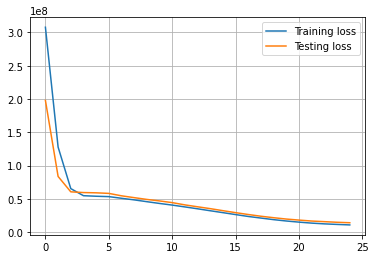

In [34]:
plt.plot(r1['Epochs'],r1['loss'],label='Training loss')
plt.plot(r1['Epochs'],r1['val_loss'],label='Testing loss')
plt.legend()
plt.grid()
plt.show()

In [35]:
ypred_m1 = m1.predict(x_test)
print(ypred_m1)

[[ 8030.7163]
 [10262.995 ]
 [11627.598 ]
 [10082.691 ]
 [ 8350.757 ]
 [12265.228 ]
 [ 9024.853 ]
 [12152.606 ]
 [10724.695 ]
 [ 6827.1978]
 [13720.358 ]
 [ 9925.351 ]
 [10281.63  ]
 [10885.935 ]
 [ 9375.583 ]
 [10436.8   ]
 [ 9298.194 ]
 [10697.841 ]
 [ 9643.698 ]
 [11081.897 ]
 [10546.509 ]
 [ 9294.035 ]
 [ 9533.032 ]
 [11493.316 ]
 [11207.122 ]
 [ 9805.61  ]
 [11364.999 ]
 [11852.469 ]
 [10956.116 ]
 [10111.982 ]
 [ 8335.38  ]
 [ 9350.163 ]
 [10154.584 ]
 [ 7878.138 ]
 [ 8563.224 ]
 [10751.339 ]
 [ 7851.0522]
 [ 7154.7905]
 [ 9837.219 ]
 [11529.1045]
 [12288.002 ]
 [10695.873 ]
 [10552.671 ]
 [11120.6455]
 [10570.388 ]
 [10385.808 ]
 [ 7978.439 ]
 [11138.952 ]
 [10673.794 ]
 [10072.885 ]
 [10940.85  ]
 [ 8532.076 ]
 [10074.931 ]
 [10570.07  ]
 [10478.909 ]
 [10883.762 ]
 [11289.931 ]
 [10401.517 ]
 [ 8027.9175]
 [11501.784 ]
 [ 9135.285 ]
 [11320.855 ]
 [ 9695.971 ]
 [ 9387.208 ]
 [11784.61  ]
 [12193.326 ]
 [ 9519.735 ]
 [ 7875.163 ]
 [11008.692 ]
 [10991.999 ]
 [13719.812 ]
 [1061

In [36]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [ ]:
# MSE = (1/n)*sum((yi - ypredi)^2)
# RMSE = sqrt((1/n)*sum((yi - ypredi)^2))
# MAE =  (1/n)*abs(yi - ypredi)    

In [37]:
def reg_metrics(ytest,ypred):
    mse = mean_squared_error(ytest,ypred)
    rmse = np.sqrt(mean_squared_error(ytest,ypred))
    mae = mean_absolute_error(ytest,ypred)
    print('MSE',mse)
    print('RMSE',rmse)
    print('MAE',mae)

In [38]:
reg_metrics(y_test,ypred_m1)

MSE 14123245.501390724
RMSE 3758.0906723216144
MAE 2268.0295920199337


#### Model - 2

In [40]:
m2 = Sequential()                                      
m2.add(Dense(42,activation='relu',input_dim=7))       
m2.add(Dense(28, activation=relu))                      
m2.add(Dense(14, activation=relu))
m2.add(Dense(7, activation=relu))
m2.add(Dense(1))                           

m2.compile(optimizer=adam, loss='mse')

In [41]:
h2 = m2.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=30)

Epoch 1/30
34/34 [==============================] - 1s 12ms/step - loss: 55547824.0000 - val_loss: 52863416.0000
Epoch 2/30
34/34 [==============================] - 0s 5ms/step - loss: 34852768.0000 - val_loss: 15935896.0000
Epoch 3/30
34/34 [==============================] - 0s 4ms/step - loss: 7954491.0000 - val_loss: 7350690.0000
Epoch 4/30
34/34 [==============================] - 0s 5ms/step - loss: 5730447.0000 - val_loss: 12620680.0000
Epoch 5/30
34/34 [==============================] - 0s 5ms/step - loss: 6853925.0000 - val_loss: 7736829.0000
Epoch 6/30
34/34 [==============================] - 0s 5ms/step - loss: 5800087.5000 - val_loss: 6835511.5000
Epoch 7/30
34/34 [==============================] - 0s 5ms/step - loss: 6081410.0000 - val_loss: 6720275.5000
Epoch 8/30
34/34 [==============================] - 0s 5ms/step - loss: 5268875.0000 - val_loss: 6463995.0000
Epoch 9/30
34/34 [==============================] - 0s 4ms/step - loss: 5292874.0000 - val_loss: 7182282.5000
Epoc

In [42]:
r2 = pd.DataFrame(h2.history)
r2['Epochs'] = h2.epoch
r2.tail()

,loss,val_loss,Epochs
25,5166779.5,6416439.5,25
26,5155668.0,6870122.5,26
27,4956541.0,6420613.5,27
28,4862318.5,6276238.5,28
29,4702054.5,6223802.0,29


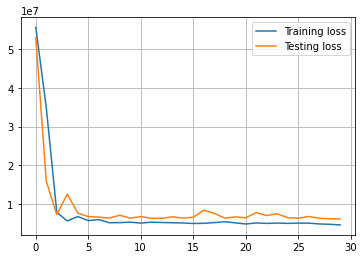

In [43]:
plt.plot(r2['Epochs'],r2['loss'],label='Training loss')
plt.plot(r2['Epochs'],r2['val_loss'],label='Testing loss')
plt.legend()
plt.grid()
plt.show()

In [44]:
ypred_m2 = m2.predict(x_test)
print(ypred_m2)

[[ 7592.5444]
 [ 9738.57  ]
 [12801.377 ]
 [ 9624.27  ]
 [ 7879.303 ]
 [15286.03  ]
 [ 8879.58  ]
 [14435.854 ]
 [10156.117 ]
 [ 7705.018 ]
 [16067.148 ]
 [ 9419.174 ]
 [10690.599 ]
 [10464.17  ]
 [ 8675.854 ]
 [ 9867.423 ]
 [18712.697 ]
 [10377.603 ]
 [ 9260.406 ]
 [11172.091 ]
 [ 9913.966 ]
 [ 9070.774 ]
 [ 9300.168 ]
 [12129.014 ]
 [11514.41  ]
 [ 9354.637 ]
 [11760.457 ]
 [13197.0625]
 [10747.573 ]
 [ 9565.889 ]
 [ 7882.308 ]
 [ 9011.809 ]
 [ 9598.477 ]
 [ 7957.443 ]
 [ 8464.13  ]
 [10324.246 ]
 [ 7468.9194]
 [ 6968.6934]
 [13557.018 ]
 [12281.685 ]
 [15013.242 ]
 [11473.858 ]
 [ 9939.355 ]
 [13207.078 ]
 [11325.099 ]
 [ 9823.663 ]
 [ 8153.387 ]
 [11040.527 ]
 [10171.974 ]
 [ 9528.18  ]
 [10834.362 ]
 [ 8774.934 ]
 [ 9768.189 ]
 [ 9896.8545]
 [ 9813.988 ]
 [10665.153 ]
 [12948.576 ]
 [ 9870.4375]
 [ 8074.2925]
 [16688.04  ]
 [ 8860.083 ]
 [11639.486 ]
 [ 9396.06  ]
 [ 9045.544 ]
 [13030.5625]
 [14113.002 ]
 [ 9131.244 ]
 [19777.828 ]
 [11585.263 ]
 [11146.889 ]
 [16040.02  ]
 [ 998

In [45]:
reg_metrics(y_test,ypred_m2)

MSE 6223802.08275755
RMSE 2494.7549143668502
MAE 1800.030455692897


In [46]:
reg_metrics(y_test,ypred_m1)

MSE 14123245.501390724
RMSE 3758.0906723216144
MAE 2268.0295920199337
